----
# SVM classification using sklearn
----

In [98]:
%load_ext autoreload
%autoreload 2

from sklearn.metrics import confusion_matrix as skconfmatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Set correct working directory
if os.getcwd() != os.path.abspath("../Python"):
    os.chdir("../../Python")

# Import files from /Python directory
from confusion_matrix import confusion_matrix,false_info

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
# Load data sets
trn_data = pd.read_csv(f"../TrainingData/neodata/soltani_14d_nonoise_1200.csv").sample(frac=0.1)
vld_data = pd.read_csv(f"../ValidationData/neodata/soltani_14d_nonoise_1200.csv")
tst_data = pd.read_csv(f"../TestData/neodata/soltani_14d_nonoise_100.csv")

# Separate into data and targets
y_trn = trn_data.pop('target')
X_trn = trn_data

y_vld = vld_data.pop('target')
X_vld = vld_data

y_tst = tst_data.pop('target')
X_tst = tst_data

# Extract and keep only class 0, 8 and 8

In [100]:
X_trn = X_trn[(y_trn == 0) | (y_trn == 8) | (y_trn == 18)]
y_trn = y_trn[(y_trn == 0) | (y_trn == 8) | (y_trn == 18)]

X_tst = X_tst[(y_tst == 0) | (y_tst == 8) | (y_tst == 18)]
y_tst = y_tst[(y_tst == 0) | (y_tst == 8) | (y_tst == 18)]

X_vld = X_vld[(y_vld == 0) | (y_vld == 8) | (y_vld == 18)]
y_vld = y_vld[(y_vld == 0) | (y_vld == 8) | (y_vld == 18)]

In [101]:
X_trn = X_trn.drop(columns=['Density','CprPower','Psuc'])
X_tst = X_tst.drop(columns=['Density','CprPower','Psuc'])
X_vld = X_vld.drop(columns=['Density','CprPower','Psuc'])
X_trn.head()

,Pdis,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,Tamb,Tset
0,8.931735,-7.327275,35.250968,62.398172,9.213731,5.218196,12.545463,-0.007051,91.677418,30,0
1,8.283502,8.350783,32.555930,36.902906,19.335149,14.454287,6.103873,12.023629,61.732558,10,12
2,7.998677,4.392486,31.320564,38.446461,12.682279,9.347677,4.938300,7.049683,48.006264,10,7
3,8.460851,7.719790,33.308655,39.283819,20.119498,14.619819,6.900041,12.022797,70.096165,30,12
4,9.377305,-1.469814,37.019220,58.629453,17.894334,11.548947,13.018770,7.004961,100.000000,30,7


## Standardize data

In [102]:
# Use standard scaler for scaling
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()

# Use PCA sphering/whitening for scaling
# from sklearn.decomposition import PCA
# standardizer = PCA(whiten=True)

X_trn = standardizer.fit_transform(X_trn)
X_vld = standardizer.transform(X_vld)
X_tst = standardizer.transform(X_tst)

---

# SVM fitting

In [103]:
# Setup axis ticks with classes removed
ticks = [[x for x in range(len(y_trn.unique()))],y_trn.unique()]

In [131]:
# Training the SVM, on the 5 dimensional data
from sklearn import svm
clf = svm.SVC( C=100, decision_function_shape="ovo", gamma=.1 )

clf.fit(X_trn,y_trn)

SVC(C=100, decision_function_shape='ovo', gamma=0.1)

# Classifying training data

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:title={'center':'SVM on training set for faults 0, 8 and 18 : Accuracy 49.611%'}, xlabel='Predicted class', ylabel='True class'>)

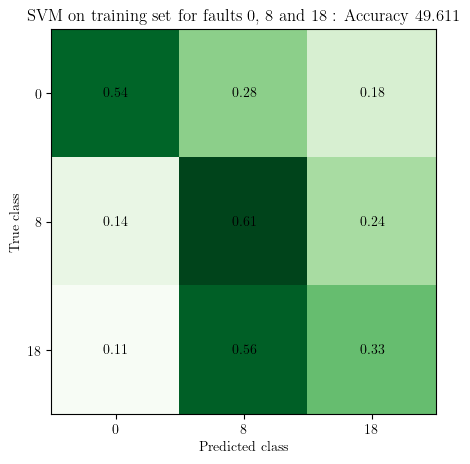

In [132]:
# Make predictions for the training set
y_hat_trn = clf.predict(X_trn)

# plot the confusion matrix
conf_matrix_trn = skconfmatrix(y_trn,y_hat_trn)
confusion_matrix(conf_matrix_trn, figsize = (5,5),axis_ticks = ticks,title='SVM on training set for faults 0, 8 and 18')

# Classifying validation data

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:title={'center':'SVM on validation set for faults 0, 8 and 18 : Accuracy 50.083%'}, xlabel='Predicted class', ylabel='True class'>)

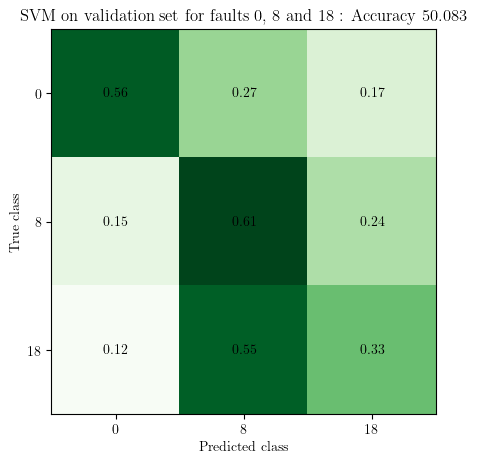

In [133]:
# Make predictions for the training set
y_hat_vld = clf.predict(X_vld)

#plot the confusion matrix
conf_matrix_vld = skconfmatrix(y_vld,y_hat_vld)
confusion_matrix(conf_matrix_vld, figsize = (5,5),axis_ticks = ticks,title='SVM on validation set for faults 0, 8 and 18',save_fig_name = "../ConfusionPlots/Full_SVM_validation_rm_8_18.pdf")

# Classifying test data

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:title={'center':'SVM on test set for faults 0, 8 and 18 : Accuracy 33.333%'}, xlabel='Predicted class', ylabel='True class'>)

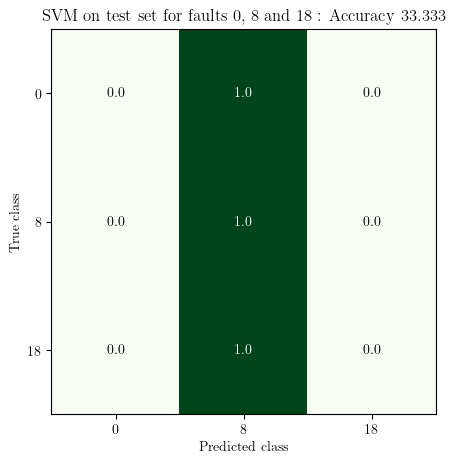

In [134]:
# Make predictions for the training set
y_hat_tst = clf.predict(X_tst)

#plot the confusion matrix
conf_matrix_vld = skconfmatrix(y_tst,y_hat_tst)
confusion_matrix(conf_matrix_vld, figsize = (5,5),axis_ticks = ticks,title='SVM on test set for faults 0, 8 and 18',save_fig_name = "../ConfusionPlots/Full_SVM_test_rm_8_18.pdf")